### stat test test

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import pickle
import numpy as np
import os
from collections import defaultdict

In [2]:
def plot_permutation_test(y_true, y_pred, n_permutations=1000):
    observed_acc = np.mean(y_true == y_pred)
    random_accs = []
    
    for _ in range(n_permutations):
        shuffled_true = np.random.permutation(y_true)
        random_acc = np.mean(shuffled_true == y_pred)
        random_accs.append(random_acc)
    
    plt.figure(figsize=(10, 6))
    plt.hist(random_accs, bins=50, alpha=0.7, color='lightblue', 
             label='Random chance distribution')
    plt.axvline(observed_acc, color='red', linestyle='--', linewidth=2,
                label=f'Your model: {observed_acc:.3f}')
    plt.axvline(np.mean(random_accs), color='gray', linestyle='-',
                label=f'Expected chance: {np.mean(random_accs):.3f}')
    
    p_value = np.mean(np.array(random_accs) >= observed_acc)
    plt.title(f'Permutation Test Results (p-value = {p_value:.4f})')
    plt.xlabel('Accuracy')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()
    
    return p_value



def plot_confusion_with_significance(y_true, y_pred, p_value):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix (p-value: {p_value:.4f})')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

In [3]:
import os
import pickle
from collections import defaultdict

# Define which dataset task names to track (from the project_name field)
dataset_keys = ["read-prod", "read-prod-prod", "prod-read-read", "read", "prod",]
# Sort keys by length (descending) to avoid partial substring matches
dataset_keys = sorted(dataset_keys, key=len, reverse=True)

results_by_dataset = {key: [] for key in dataset_keys}
results_directory = "/pasteur/appa/homes/cbangu/MEG-Decoding/test_results_final"

for root, _, files in os.walk(results_directory):
    for file in files:
        if file.endswith(".pkl"):
            full_path = os.path.join(root, file)
            try:
                with open(full_path, "rb") as f:
                    result = pickle.load(f)
                    project_name = result.get("project_name", "").lower()
                    
                    for key in dataset_keys:
                        if key in project_name:
                            results_by_dataset[key].append(result)
                            break  # stop after first match

            except Exception as e:
                print(f"Failed to load {file}: {e}")

In [4]:
files

['AlexNetBigHead-broca-prod-read-read-test_20250602_114703_test_results.pkl',
 'AlexNetBigHead-combo-read-prod-prod-test_20250602_113622_test_results.pkl',
 'AlexNetBigHead-combo-read-test_20250602_082331_test_results.pkl',
 'AlexNetBigHead-broca-prod-read-read-test_20250602_114524_test_results.pkl',
 'AlexNetBigHead-combo-read-prod-prod-test_20250602_113445_test_results.pkl',
 'AlexNetBigHead-combo-read-prod-prod-test_20250602_113825_test_results.pkl',
 'AlexNetBigHead-broca-read-prod-test_20250602_111734_test_results.pkl',
 'AlexNetBigHead-broca-prod-read-read-test_20250602_114003_test_results.pkl',
 'AlexNetBigHead-combo-read-test_20250602_083950_test_results.pkl',
 'AlexNetBigHead-broca-read-prod-test_20250602_111739_test_results.pkl',
 'AlexNetBigHead-broca-prod-test_20250602_105528_test_results.pkl',
 'AlexNetBigHead-combo-read-test_20250602_080730_test_results.pkl',
 'AlexNetBigHead-combo-read-test_20250602_081048_test_results.pkl',
 'AlexNetBigHead-broca-read-prod-test_20250602

In [5]:
import re

def extract_info(project_name):
    # Example: "AlexNetBigHead-broca-prod-read-read-test"
    parts = project_name.split("-")
    model = parts[0]
    roi = parts[1]
    
    task = "-".join(parts[2:-1])  # combine 'prod-read-read'
    return model, roi, task

In [6]:
plt.figure(figsize=(12, 6))
sns.boxplot(x="Task", y="Accuracy", hue="ROI", data=df)
sns.stripplot(x="Task", y="Accuracy", hue="ROI", data=df,
              dodge=True, color="black", alpha=0.5, marker='x', legend=False)

plt.title("Model Performance Across Random Seeds")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

NameError: name 'df' is not defined

<Figure size 1200x600 with 0 Axes>

In [ ]:
df

/local/scratch/tmp/ipykernel_4112670/2515261957.py:61: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.

  sns.stripplot(


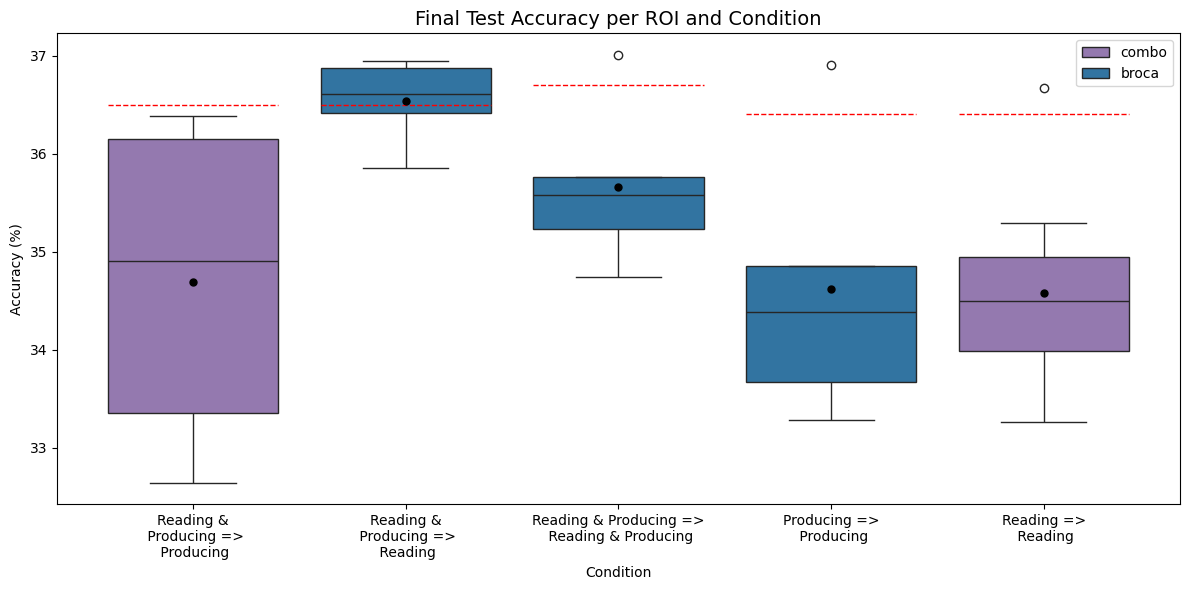

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Mapping for nicer dataset names
dataset_name_map = {
    "read-prod-prod": "Reading &\n Producing =>\n Producing",
    "prod-read-read": "Reading &\n Producing =>\n Reading",
    "read-prod": "Reading & Producing =>\n Reading & Producing",
    "prod": "Producing =>\n Producing",
    "read": "Reading =>\n Reading"
}

# Color for each ROI
custom_palette = {
    "combo": "#9470b8",
    "broca": "#1f77b4",
    "sma": "orange",
    "spt": "green",
    "stg": "red",
    "16x16": "gray"
}

# Chance level line for each dataset
chance_level = {
    "read": 36.4,
    "prod": 36.4,
    "read-prod": 36.7,
    "read-prod-prod": 36.5,
    "prod-read-read": 36.5,
}

# Collect all data
all_data = []
for dataset_name, dataset_results in results_by_dataset.items():
    for res in dataset_results:
        project = res.get("project_name", "")
        acc = res.get("final_test_accuracy", None)
        if acc is not None:
            try:
                roi = project.split("-")[1]
                all_data.append({
                    "Dataset": dataset_name_map[dataset_name],
                    "ShortName": dataset_name,
                    "ROI": roi,
                    "Accuracy": acc
                })
            except IndexError:
                print(f"[Warning] Could not extract ROI from: {project}")

df = pd.DataFrame(all_data)

# Sort datasets in preferred order
ordered_datasets = [dataset_name_map[k] for k in dataset_name_map.keys()]
plt.figure(figsize=(12, 6))
ax = sns.boxplot(
    data=df, x="Dataset", y="Accuracy", hue="ROI", palette=custom_palette,
    order=ordered_datasets, showmeans=True,
    meanprops={"marker": "o", "markerfacecolor": "black", "markeredgecolor": "black", "markersize": 5}
)
sns.stripplot(
    data=df, x="Dataset", y="Accuracy", hue="ROI", dodge=True, jitter=True,
    color="black", alpha=0.5, marker="x", ax=ax,
    legend=False
)

# Plot chance lines for each dataset
# Draw short chance lines under each dataset group
n_rois = df["ROI"].nunique()
group_width = 0.8  # Seaborn's default boxplot group width
total_width = group_width
each_width = total_width / n_rois

for i, dataset in enumerate(dataset_name_map.keys()):
    y = chance_level[dataset]
    x_center = i
    x_start = x_center - group_width / 2
    x_end = x_center + group_width / 2
    ax.hlines(y=y, xmin=x_start, xmax=x_end, colors='red', linestyles='--', linewidth=1)

plt.title("Final Test Accuracy per ROI and Condition", fontsize=14)
plt.ylabel("Accuracy (%)")
plt.xlabel("Condition")
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles[:len(custom_palette)], labels[:len(custom_palette)], loc='upper right')
plt.tight_layout()
plt.savefig("all-rois-all-datasets.png", dpi=300)
plt.show()

In [17]:
from scipy.stats import wilcoxon
from statsmodels.stats.multitest import multipletests

chance_levels = {
    "read": 0.364,
    "prod": 0.364,
    "read-prod": 0.367,
    "read-prod-prod": 0.365,
    "prod-read-read": 0.365,
}

all_results = []

for dataset_name, chance_level in chance_levels.items():
    dataset_results = results_by_dataset.get(dataset_name, [])
    roi_scores = {}

    for res in dataset_results:
        acc = res.get("final_test_accuracy", None)
        project = res.get("project_name", "")
        
        if acc is not None and "-" in project:
            try:
                roi = project.split("-")[1]
                roi_scores.setdefault(roi, []).append(acc / 100.0)  # convert from % to proportion
            except IndexError:
                continue

    # Perform Wilcoxon tests
    p_vals = {}
    for roi, scores in roi_scores.items():
        if len(scores) < 2:
            continue
        try:
            stat, p = wilcoxon(scores, [chance_level] * len(scores), alternative="greater")
            p_vals[roi] = p
        except ValueError:
            continue

    # FDR correction
    if p_vals:
        rois = list(p_vals.keys())
        raw_pvals = [p_vals[r] for r in rois]
        rej, adj_pvals, _, _ = multipletests(raw_pvals, method="fdr_bh")
        
        for roi, raw_p, adj_p, keep in zip(rois, raw_pvals, adj_pvals, rej):
            print(f"Dataset: {dataset_name}, ROI: {roi}, Raw p: {raw_p:.4g}, Adj p: {adj_p:.4g}, Significant: {'Yes' if keep else 'No'}")

Dataset: read, ROI: combo, Raw p: 0.999, Adj p: 0.999, Significant: No
Dataset: prod, ROI: broca, Raw p: 0.9688, Adj p: 0.9688, Significant: No
Dataset: read-prod, ROI: broca, Raw p: 0.9688, Adj p: 0.9688, Significant: No
Dataset: read-prod-prod, ROI: combo, Raw p: 1, Adj p: 1, Significant: No
Dataset: prod-read-read, ROI: broca, Raw p: 0.4062, Adj p: 0.4062, Significant: No


In [75]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

# Define a function to compute specificity from the confusion matrix
def compute_specificity(conf_matrix, num_classes):
    specificity_per_class = []
    for i in range(num_classes):
        TP = conf_matrix[i, i]
        FP = conf_matrix[:, i].sum() - TP
        FN = conf_matrix[i, :].sum() - TP
        TN = conf_matrix.sum() - (TP + FP + FN)
        specificity = TN / (TN + FP) if (TN + FP) > 0 else 0
        specificity_per_class.append(specificity)
    return np.mean(specificity_per_class)

# Aggregate statistics
summary_data = []

for dataset, results in results_by_dataset.items():
    for run in results:
        y_true = run["y_true"]
        y_pred = run["y_pred_classes"]
        n_classes = run["n_classes"]
        model = run["model_type"]
        project = run["project_name"]

        report = classification_report(y_true, y_pred, output_dict=True, zero_division=0)
        conf_matrix = confusion_matrix(y_true, y_pred, labels=range(n_classes))
        specificity = compute_specificity(conf_matrix, n_classes)

        summary_data.append({
            "dataset": dataset,
            "model": model,
            "project_name": project,
            "accuracy": report["accuracy"],
            "macro_precision": report["macro avg"]["precision"],
            "macro_recall": report["macro avg"]["recall"],
            "macro_f1": report["macro avg"]["f1-score"],
            "specificity": specificity
        })

summary_df = pd.DataFrame(summary_data)


In [76]:
summary_df

,dataset,model,project_name,accuracy,macro_precision,macro_recall,macro_f1,specificity
0,read-prod-prod,AlexNetBigHead,AlexNetBigHead-combo-read-prod-prod-test,0.363808,0.362310,0.362281,0.359145,0.680961
1,read-prod-prod,AlexNetBigHead,AlexNetBigHead-combo-read-prod-prod-test,0.361541,0.358475,0.355556,0.345616,0.677246
2,read-prod-prod,AlexNetBigHead,AlexNetBigHead-combo-read-prod-prod-test,0.333585,0.327537,0.326212,0.297522,0.662352
3,read-prod-prod,AlexNetBigHead,AlexNetBigHead-combo-read-prod-prod-test,0.326407,0.317568,0.327549,0.297887,0.663165
4,read-prod-prod,AlexNetBigHead,AlexNetBigHead-combo-read-prod-prod-test,0.349074,0.340735,0.348796,0.306606,0.673443
5,prod-read-read,AlexNetBigHead,AlexNetBigHead-broca-prod-read-read-test,0.368719,0.359091,0.345385,0.306366,0.672818
6,prod-read-read,AlexNetBigHead,AlexNetBigHead-broca-prod-read-read-test,0.364186,0.347472,0.343936,0.317875,0.672184
7,prod-read-read,AlexNetBigHead,AlexNetBigHead-broca-prod-read-read-test,0.366075,0.349519,0.344664,0.313192,0.672548
8,prod-read-read,AlexNetBigHead,AlexNetBigHead-broca-prod-read-read-test,0.369475,0.356582,0.353784,0.340764,0.677249
9,prod-read-read,AlexNetBigHead,AlexNetBigHead-broca-prod-read-read-test,0.358519,0.325145,0.336964,0.292351,0.668697


In [77]:
aggregated_df = summary_df.groupby("project_name").agg(
    accuracy_mean=("accuracy", "mean"),
    accuracy_std=("accuracy", "std"),
    precision_mean=("macro_precision", "mean"),
    precision_std=("macro_precision", "std"),
    recall_mean=("macro_recall", "mean"),
    recall_std=("macro_recall", "std"),
    f1_mean=("macro_f1", "mean"),
    f1_std=("macro_f1", "std"),
    specificity_mean=("specificity", "mean"),
    specificity_std=("specificity", "std")
).reset_index()

aggregated_df

,project_name,accuracy_mean,accuracy_std,precision_mean,precision_std,recall_mean,recall_std,f1_mean,f1_std,specificity_mean,specificity_std
0,AlexNetBigHead-broca-prod-read-read-test,0.365395,0.004385,0.347562,0.013422,0.344946,0.005982,0.314109,0.017740,0.672699,0.003042
1,AlexNetBigHead-broca-prod-test,0.346184,0.014140,0.325405,0.018282,0.329723,0.008174,0.280684,0.033967,0.664913,0.004246
2,AlexNetBigHead-broca-read-prod-test,0.356647,0.008455,0.353170,0.008175,0.352445,0.008350,0.351979,0.008683,0.675584,0.004261
3,AlexNetBigHead-combo-read-prod-prod-test,0.346883,0.016600,0.341325,0.019296,0.344079,0.016415,0.321355,0.028952,0.671433,0.008358
4,AlexNetBigHead-combo-read-test,0.345752,0.009667,0.343793,0.009523,0.345130,0.009382,0.343409,0.009592,0.671738,0.004709


In [ ]:
import pickle
import os
from sklearn.metrics import classification_report
import pandas as pd

# Path to your pickled results
result_dir = "your_result_folder"
files = [f for f in os.listdir(result_dir) if f.endswith(".pkl")]

all_reports = []

for file in files:
    with open(os.path.join(result_dir, file), "rb") as f:
        data = pickle.load(f)
        y_true = data["y_true"]
        y_pred = data["y_pred"]

        # Compute report as a dict (per class metrics)
        report = classification_report(y_true, y_pred, output_dict=True, zero_division=0)
        all_reports.append(report)

# Average across seeds
class_labels = ["0", "1", "2"]  # or your class names
avg_report = {}

for label in class_labels:
    avg_report[label] = {}
    for metric in ["precision", "recall", "f1-score", "support"]:
        values = [rep[label][metric] for rep in all_reports]
        avg_report[label][metric] = sum(values) / len(values)

# Convert to DataFrame for display
df = pd.DataFrame(avg_report).T
print(df)